#Materi

**Pembelajaran mesin** adalah bidang yang mengajarkan mesin dan komputer untuk belajar dari data yang ada untuk membuat prediksi. pada kursus ini Anda akan mempelajari cara menggunakan Python untuk melakukan supervised learning, komponen penting dari machine learning. Anda akan mempelajari cara membuat model prediktif, menyesuaikan parameternya, dan menentukan seberapa baik performanya dengan data yang tidak terlihat (unseen data) — semuanya sambil menggunakan kumpulan data dunia yang real. Anda akan menggunakan scikit-learn, salah satu library machine learning paling populer dan user-friendly untuk Python. Ini juga terintegrasi dengan sangat baik dengan SciPy stack, termasuk libraries seperti NumPy. Ada sejumlah library ML lain di luar sana, seperti TensorFlow dan keras, yang sangat layak untuk dicoba setelah Anda memahami dasar-dasarnya.

Tujuan dari supervised learning sering kali untuk mengotomatiskan tugas manual yang memakan waktu atau mahal, seperti diagnosis dokter, atau untuk membuat prediksi tentang masa depan, katakan apakah pelanggan akan mengklik sebuah add atau tidak. Untuk supervised learning, Anda memerlukan data berlabel dan ada banyak cara untuk mendapatkannya: Anda bisa mendapatkan data historis, yang sudah memiliki label yang Anda minati; Anda dapat melakukan eksperimen untuk mendapatkan data berlabel, seperti pengujian A / B untuk melihat berapa banyak klik yang Anda dapatkan; atau Anda juga dapat melakukan crowdsourcing data pelabelan, seperti yang dilakukan reCAPTCHA untuk pengenalan teks. Bagaimanapun, tujuannya adalah untuk belajar dari data yang keluaran yang benarnya telah diketahui, sehingga kita dapat membuat prediksi pada data baru yang keluarannya tidak kita ketahui.

#Classification
Dalam bab ini, Anda akan diperkenalkan pada masalah klasifikasi dan belajar bagaimana menyelesaikannya menggunakan *supervised learning techniques*. Dan Anda akan menerapkan apa yang Anda pelajari ke kumpulan data politik, tempat Anda mengklasifikasikan afiliasi partai dari anggota kongres Amerika Serikat berdasarkan catatan pemungutan suara mereka.


**Manakah dari berikut ini yang merupakan masalah klasifikasi?**

Setelah Anda memutuskan untuk memanfaatkan supervised learning untuk memecahkan masalah baru, Anda perlu mengidentifikasi apakah masalah Anda lebih cocok untuk **klasifikasi atau regresi**. Latihan ini akan membantu Anda mengembangkan intuisi Anda untuk membedakan keduanya.

Diberikan di bawah ini adalah 4 contoh aplikasi pembelajaran mesin. Manakah dari mereka yang merupakan masalah klasifikasi yang diawasi (supervised classification problem)?


**a.** Menggunakan data keuangan berlabel untuk memprediksi apakah nilai saham **akan naik atau turun minggu depan**.

b. Menggunakan data harga rumah berlabel untuk memprediksi **harga rumah baru** berdasarkan berbagai fitur.


c. Menggunakan data tak berlabel untuk mengelompokkan siswa dari perusahaan pendidikan online ke dalam berbagai kategori berdasarkan gaya belajar mereka.

d. Menggunakan data keuangan berlabel untuk memprediksi berapa **nilai saham minggu depan**

Keterangan: yang b dan d: harga rumah dan nilai saham adalah variabel kuantitatif. Ini bukan masalah klasifikasi.

## Contoh klasifikasi

**Dataset Iris** berisi data mengenai bunga iris yang ciri-cirinya terdiri dari empat ukuran: panjang kelopak (petal length), lebar kelopak (petal width), panjang sepal (sepal length), dan lebar sepal (sepal width). Variabel target mengkodekan spesies bunga dan ada tiga kemungkinan: 'versicolor', 'virginica', dan 'setosa'.

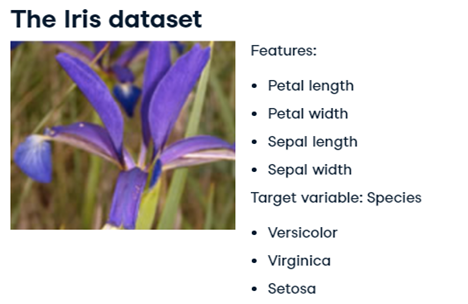

Karena ini adalah salah satu set data yang termasuk dalam scikit-learn, kita akan mengimpornya dari sana dengan set data impor sklearn. Kami juga akan mengimpor panda, numpy, dan pyplot dengan alias standarnya. Selain itu, kita akan menyetel gaya plot ke ggplot menggunakan plt.style.use. 

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
# load iris dataset
iris = datasets.load_iris()
type(iris) #memeriksa type atau jenis dari iris

sklearn.utils.Bunch

kita melihat bahwa itu adalah bunch (sekelompok data), yang mirip dengan dictionary di dalamnya berisi pasangan key-value.

In [ ]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


kita melihat bahwa itu adalah data, yang berisi fitur nilai; target, yaitu data target; target_names; DESCR, yang memberikan deskripsi dari dataset; feature_names; dan juga filename.

In [ ]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

Seperti yang Anda lihat di sini, fitur dan data target disediakan sebagai array NumPy.

In [ ]:
iris.data.shape

(150, 4)

dot shape attribute dari array fitur data memberi tahu kita bahwa ada 150 baris dan empat kolom.

**Ingat: sampel ada dalam baris, fitur ada dalam kolom.**

Jadi fiturnya adalah: petal length and width and sepal length and width

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Selain itu, perhatikan bahwa variabel target dikodekan sebagai nol untuk "setosa", 1 untuk "versicolor" dan 2 untuk "virginica". Kita dapat melihat ini dengan mencetak nama target titik iris, di mana "setosa" sesuai dengan indeks 0, "versicolor" untuk indeks 1 dan "virginica" untuk indeks 2.

In [ ]:
iris.target_names[2]

'virginica'

**Exploratory data analysis (EDA)**

Untuk melakukan beberapa awal analisis data eksplorasi, atau singkatnya EDA, kita akan menetapkan fitur dan data target ke X dan y. Kita kemudian akan membangun DataFrame dari data fitur menggunakan pd.DataFrame dan juga meneruskan nama kolom. Melihat *head* data menunjukkan kepada kita lima baris pertama.

In [ ]:
X= iris.data
y= iris.target
df= pd.DataFrame(X, columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
new_df= df.copy()

In [ ]:
new_df['class'] = y
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Visual EDA**

Sekarang, kita akan melakukan sedikit EDA visual. Kita menggunakan *pandas function scatter matrix* (fungsi pandas matrix pencar) untuk memvisualisasikan kumpulan data kita. Kita meneruskannya ke DataFrame kita, bersama dengan variabel target kita sebagai argumen ke parameter c, yang berarti warna, memastikan bahwa poin data kita di gambar kita akan diwarnai oleh spesies mereka. Kita juga memberikan daftar(list) ke ukuran gambar, yang menentukan ukuran gambar kita, serta ukuran(size) dan bentuk(shape) penanda.

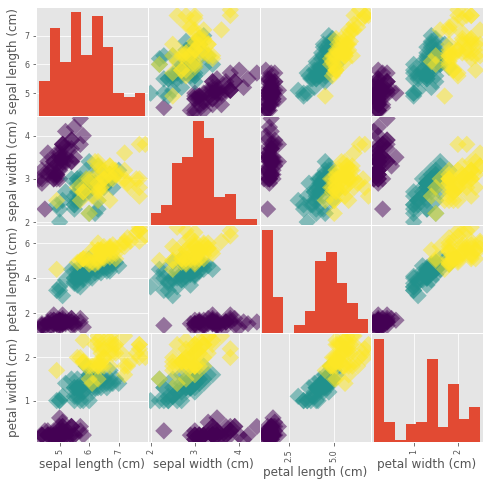

In [ ]:
w= pd.plotting.scatter_matrix(df,c = y, figsize = [8,8], s = 150, marker = 'D')

Hasilnya adalah matriks gambar, yang pada diagonalnya terdapat histogram fitur yang sesuai dengan baris dan kolom. Gambar off-diagonal adalah *scatter plots of the column feature versus row feature colored by the target variable* (sebaran fitur kolom versus fitur baris yang diwarnai oleh variabel target). Ada banyak informasi dalam matriks pencar (scatter matrix) ini.

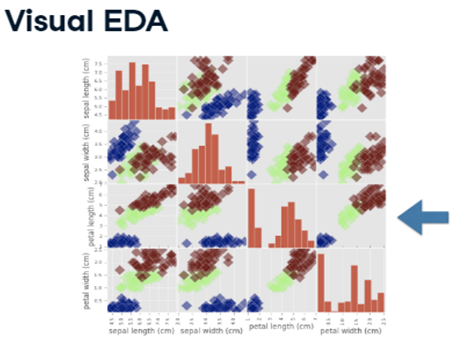

Lihat, gambar diatas, bahwa *petal width and length are highly correlated* (lebar dan panjang kelopak sangat berkorelasi), seperti yang Anda duga, dan bahwa bunga di klasifikasikan menurut spesies.

## Latihan 

**Numerical EDA**
Dalam bab ini, Anda akan bekerja dengan kumpulan data yang diperoleh dari [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) yang terdiri dari suara yang dibuat oleh Anggota Kongres Dewan Perwakilan Rakyat AS. Tujuan Anda adalah memprediksi afiliasi partai mereka ('Demokrat' atau 'Republik') berdasarkan cara mereka memberikan suara pada masalah-masalah utama tertentu. Di sini, perlu dicatat bahwa kami telah memproses set data ini sebelumnya untuk menangani nilai yang hilang. Ini agar fokus Anda dapat diarahkan pada pemahaman bagaimana melatih dan mengevaluasi model pembelajaran yang diawasi. Setelah Anda menguasai dasar-dasar ini, Anda akan diperkenalkan dengan teknik preprocessing di Bab 4 dan memiliki kesempatan untuk menerapkannya sendiri di sana - termasuk pada kumpulan data yang sama ini!

Namun, sebelum memikirkan model pembelajaran terbimbing yang dapat Anda terapkan untuk ini, Anda perlu melakukan Analisis data eksplorasi (EDA) untuk memahami struktur datanya. Untuk penyegaran tentang pentingnya EDA, lihat dua bab pertama dari [Pemikiran Statistik dengan Python (Bagian 1)](https://www.datacamp.com/courses/statistical-thinking-in-python-part-1) .

Mulailah EDA Anda sekarang dengan menjelajahi kumpulan data catatan pemungutan suara ini secara numerik. Ini telah dimuat sebelumnya untuk Anda ke dalam DataFrame yang dipanggil df. Gunakan pandas ' .head(),, .info()dan .describe()metode di IPython Shell untuk menjelajahi DataFrame, dan pilih pernyataan di bawah ini yang tidak benar.


a.DataFrame memiliki total 435baris dan 17 kolom.

b.Kecuali 'party', semua kolom bertipe int64.

c.Dua baris pertama DataFrame terdiri dari suara yang dibuat oleh Partai Republik dan tiga baris berikutnya terdiri dari suara yang dibuat oleh Demokrat.

**d**.Ada 17 variabel prediktor , atau fitur , di DataFrame ini.

e.Variabel target dalam DataFrame ini adalah 'party'.

cara lain

voting_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                        names = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 
                                 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 
                                 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration','synfuels-corporation-cutback',
                                 'education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'])

.names files are unstructered, unfortunately for this reason you would have to open the file and extract the column names manually. 

In [ ]:
voting_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                        names = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 
                                 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 
                                 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration','synfuels-corporation-cutback', 'education-spending',
                                 'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'])

In [ ]:
# votes=pd.read_csv('house-votes-84.names')

In [ ]:
# import pandas as pd
# voting_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
#                         names = 'house-votes-84.names')

In [ ]:
type(voting_data)

pandas.core.frame.DataFrame

In [ ]:
#untuk melihat kolum atau fitur
print(voting_data.keys())

Index(['party', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')


In [ ]:
voting_data.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [ ]:
voting_data

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [ ]:
voting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   party                                   435 non-null    object
 1   handicapped-infants                     435 non-null    object
 2   water-project-cost-sharing              435 non-null    object
 3   adoption-of-the-budget-resolution       435 non-null    object
 4   physician-fee-freeze                    435 non-null    object
 5   el-salvador-aid                         435 non-null    object
 6   religious-groups-in-schools             435 non-null    object
 7   anti-satellite-test-ban                 435 non-null    object
 8   aid-to-nicaraguan-contras               435 non-null    object
 9   mx-missile                              435 non-null    object
 10  immigration                             435 non-null    object
 11  synfue

In [ ]:
voting_data.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


penjelasan ttg describe https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

**Visual EDA**

EDA Numerik yang Anda lakukan di latihan sebelumnya memberi Anda beberapa informasi yang sangat penting, seperti nama dan tipe data kolom, dan dimensi DataFrame. Mengikuti ini dengan beberapa EDA visual akan memberi Anda pemahaman yang lebih baik tentang data. Dalam penjelasan sebelumnya kita menggunakan scatter_matrix()fungsi pada data Iris untuk tujuan ini. Namun, Anda mungkin telah memperhatikan pada latihan sebelumnya bahwa semua fitur dalam kumpulan data ini adalah biner; artinya, keduanya 0 atau 1. Jadi, jenis plot yang berbeda akan lebih berguna di sini, seperti Seaborncountplot .

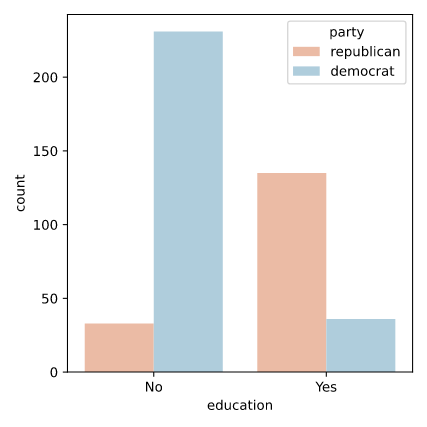

Diketahui diatas adalah salah satu countplot 'education' bill (RUU), yang dihasilkan dari kode berikut:


    import seaborn as sns
    plt.figure()
    sns.countplot(x='education', hue='party', data=df, palette='RdBu')
    plt.xticks([0,1], ['No', 'Yes'])
    plt.show()




Di sns.countplot(), kami menentukan data sumbu x menjadi 'education', dan hue(rona) menjadi 'party'. Ingat 'party'juga variabel target kami. Jadi plot yang dihasilkan menunjukkan perbedaan perilaku voting antara kedua partai untuk 'education' bill (RUU) tersebut, dengan warna masing-masing partai yang berbeda. Kami menentukan warnanya secara manual 'RdBu', karena Partai Republik secara tradisional dikaitkan dengan merah, dan Partai Demokrat dengan warna biru.

Sepertinya Demokrat dengan tegas menentang RUU ini, dibandingkan dengan Partai Republik. Ini adalah jenis informasi yang akan dicari oleh model pembelajaran mesin kami saat kami mencoba memprediksi afiliasi partai hanya berdasarkan perilaku pemungutan suara. Seorang pakar politik AS mungkin dapat memprediksi ini tanpa pembelajaran mesin, tetapi mungkin tidak secara instan - dan tentu saja tidak jika kita berurusan dengan ratusan sampel!

Di Shell IPython, jelajahi perilaku pemungutan suara lebih jauh dengan menghasilkan plot penghitung untuk RUU 'satellite'dan 'missile', dan **jawab pertanyaan berikut:** Dari dua RUU ini, yang mana yang oleh Partai Demokrat sangat mendukung , dibandingkan dengan Partai Republik? Pastikan untuk memulai pernyataan plot Anda untuk setiap gambar plt.figure()sehingga gambar baru akan dibuat. Jika tidak, plot Anda akan dihamparkan ke gambar yang sama.

In [ ]:
ynmap = {'y':1,'n':0,'?':np.nan}
partymap = {'republican':0,'democrat':1}
voting_data['party_USA'] = voting_data['party'].map(partymap)
voting_data.drop('party',axis=1,inplace=True)
for column in voting_data.columns.drop('party_USA'):
    voting_data[column+'1'] = voting_data[column].map(ynmap)
    voting_data.drop(column,axis=1,inplace=True)
data_col = voting_data.columns
voting_data.head()

,party_USA,handicapped-infants1,water-project-cost-sharing1,adoption-of-the-budget-resolution1,physician-fee-freeze1,el-salvador-aid1,religious-groups-in-schools1,anti-satellite-test-ban1,aid-to-nicaraguan-contras1,mx-missile1,immigration1,synfuels-corporation-cutback1,education-spending1,superfund-right-to-sue1,crime1,duty-free-exports1,export-administration-act-south-africa1
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [ ]:
voting_data.isnull().sum()

party_USA                                    0
handicapped-infants1                        12
water-project-cost-sharing1                 48
adoption-of-the-budget-resolution1          11
physician-fee-freeze1                       11
el-salvador-aid1                            15
religious-groups-in-schools1                11
anti-satellite-test-ban1                    14
aid-to-nicaraguan-contras1                  15
mx-missile1                                 22
immigration1                                 7
synfuels-corporation-cutback1               21
education-spending1                         31
superfund-right-to-sue1                     25
crime1                                      17
duty-free-exports1                          28
export-administration-act-south-africa1    104
dtype: int64

In [ ]:
voting_data['handicapped-infants1'].value_counts()

0.0    236
1.0    187
Name: handicapped-infants1, dtype: int64

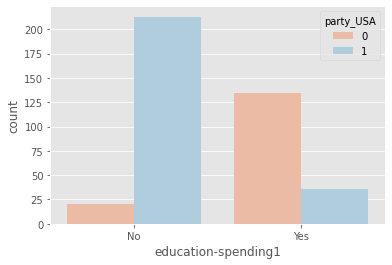

In [ ]:
import seaborn as sns
plt.figure()
ax=sns.countplot(x='education-spending1', hue='party_USA', data=voting_data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

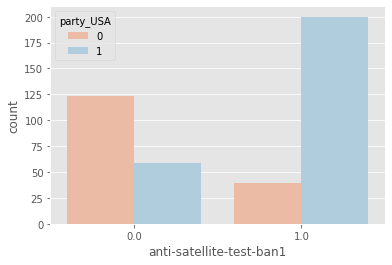

In [ ]:
plt.figure()
sns.countplot(x='anti-satellite-test-ban1', hue='party_USA', data=voting_data, palette='RdBu')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30)
plt.show()

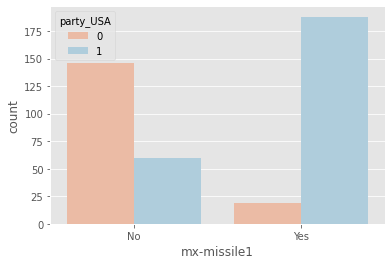

In [ ]:
plt.figure()
sns.countplot(x='mx-missile1', hue='party_USA', data=voting_data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

jawabannya Keduanya (missile dan satelit) demokrat lebih banyak mendukung




#**Tantangan klasifikasi**

Kami memiliki satu set data berlabel dan kami ingin membangun pengklasifikasi yang mengambil data tak berlabel sebagai masukan dan keluaran sebuah label. Jadi bagaimana kita membangun pengklasifikasi ini? Pertama-tama kita perlu memilih jenis pengklasifikasi dan perlu belajar dari data yang sudah diberi label. Untuk alasan ini, kami menyebut data yang sudah diberi label sebagai data pelatihan. Jadi mari kita buat pengklasifikasi pertama kita!

**k-Nearest Neighbors**

Kami akan memilih algoritme sederhana yang disebut k-Nearest Neighbors. Ide dasar k-Nearest Neighbors, atau KNN, adalah untuk memprediksi label dari setiap titik data dengan melihat K, misalnya, 3, titik data berlabel terdekat dan meminta mereka untuk memilih label apa yang harus dimiliki titik yang tidak berlabel.

Pada gambar ini, ada contoh KNN dalam dua dimensi: bagaimana Anda mengelompokkan titik data di tengah?

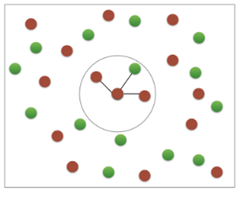

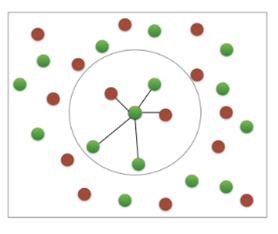

Nah, jika k sama dengan 3, Anda akan mengklasifikasikannya sebagai merah dan, jika k sama dengan 5, sebagai hijau.

**k-NN: Intuition**

Untuk mendapatkan sedikit intuisi tentang KNN, mari kita lihat diagram pencar dari dua dimensi dataset iris, panjang kelopak dan lebar kelopak (petal length and petal width). Penahan berikut untuk dimensi yang lebih tinggi, bagaimanapun, kami akan menunjukkan kasus 2D untuk tujuan ilustrasi.

Apa yang dilakukan algoritma KNN pada dasarnya adalah membuat satu set batasan keputusan (decision boundaries) dan kami memvisualisasikan kasus 2D di sini.
Setiap titik data baru di sini akan diprediksi 'setosa', 'virginica' dan setiap titik data baru di sini akan diprediksi 'versicolor'.

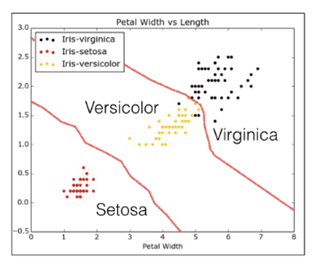

**Scikit-learn fit and predict**

Semua model pembelajaran mesin di scikit-learn diimplementasikan sebagai kelas python. Kelas-kelas ini melayani dua tujuan: mereka mengimplementasikan algoritma untuk mempelajari model, dan memprediksi, sekaligus menyimpan semua informasi yang dipelajari dari data. Melatih model (train model) pada data juga disebut menyesuaikan model (fitting model) dengan data. Dalam scikit-learn, kami menggunakan metode fit untuk melakukan ini. Demikian pula, metode prediksi adalah yang kami gunakan untuk memprediksi label titik data yang tidak berlabel.

**Using scikit-learn to fit a classifier**

Sekarang kita akan menyesuaikan pengklasifikasi pertama kita menggunakan scikit-learn! Untuk melakukannya, pertama-tama kita perlu mengimpornya. Untuk tujuan ini, kami mengimpor *KNeighboursClassifier* dari  sklearn dot neighbors. Kami kemudian membuat instance *KNeighboursClassifier* kami, mengatur jumlah neighbors sama dengan 6, dan menetapkannya ke variabel knn. Kemudian kita dapat menyesuaikan pengklasifikasi ini ke set pelatihan kita, data berlabel. Untuk melakukannya, kami menerapkan metode fit ke pengklasifikasi dan memberikan dua argumen: fitur sebagai array NumPy dan label, atau target, sebagai array NumPy. Scikit-learn API pertama-tama mengharuskan Anda memiliki data sebagai array NumPy atau pandas DataFrame. Ini juga mensyaratkan bahwa fitur mengambil nilai yang berkelanjutan, seperti harga rumah, berlawanan dengan kategori, seperti 'pria' atau 'wanita'. Ini juga mensyaratkan bahwa tidak ada nilai yang hilang dalam data. 

In [ ]:
#contoh dataset iris
from sklearn.neighbors import KNeighborsClassifier
knn_iris = KNeighborsClassifier(n_neighbors=6)
knn_iris.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Semua set data yang akan kita kerjakan sekarang memenuhi dua properti terakhir ini. Nanti di kursus, Anda akan melihat cara menangani fitur kategorikal dan data yang hilang. Secara khusus, scikit-learn API mengharuskan fitur berada dalam Array di mana setiap kolom adalah fitur dan setiap baris memiliki titik pengamatan atau data yang berbeda. Jika dilihat dari bentuk (shape) data iris , terdapat 150 pengamatan dari empat fitur. Demikian pula, target harus berupa satu kolom dengan jumlah observasi yang sama dengan data fitur. Kita lihat dalam kasus ini memang ada 150 label. Juga periksa apa yang dikembalikan saat kita menyesuaikan pengklasifikasi: ia mengembalikan pengklasifikasi itu sendiri dan memodifikasinya agar sesuai dengan data. 

In [ ]:
iris['data'].shape

(150, 4)

In [ ]:
iris['target'].shape

(150,)

Sekarang kita telah menyesuaikan pengklasifikasi kita, mari kita gunakan untuk memprediksi beberapa data yang tidak berlabel!

**Predicting on unlabeled data**

Di sini kami memiliki serangkaian pengamatan, X new. Kami menggunakan metode prediksi pada pengklasifikasi dan meneruskan datanya. Sekali lagi, API mengharuskan kita meneruskan data sebagai array NumPy dengan fitur dalam kolom dan pengamatan dalam baris; memeriksa bentuk (shape) X new, kita melihat bahwa ia memiliki tiga baris dan empat kolom, yaitu (berarti) memiliki tiga pengamatan dan empat fitur. Kemudian kita akan mengharapkan pemanggilan *knn.predict* dari X new untuk mengembalikan array tiga per satu dengan prediksi untuk setiap observasi atau baris di X new. 

In [ ]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],[5.7, 2.6, 3.8, 1.3],[4.7, 3.2, 1.3, 0.2], [5.9, 3.0, 5.1, 1.8	]])
prediction = knn_iris.predict(X_new)
X_new.shape

(4, 4)

In [ ]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0 2]


Dan memang benar! Ini memprediksi satu, yang sesuai dengan 'versicolor' untuk dua pengamatan pertama dan 0, yang sesuai dengan 'setosa' untuk yang ketiga.

#Latihan

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">k-Nearest Neighbors: Fit</h1><div class=""><p>Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame <code>df</code>. </p>
<p>In the video, Hugo discussed the importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array <code>X</code> and response variable <code>y</code>: This is in accordance with the common scikit-learn practice.</p>
<p>Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the <code>n_neighbors</code> parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called <code>df</code>.</p></div></div>

instructions

<div class="exercise--instructions exercise--typography"><div class="exercise--instructions__content"><ul>
<li>Import <code>KNeighborsClassifier</code> from <code>sklearn.neighbors</code>.</li>
<li>Create arrays <code>X</code> and <code>y</code> for the features and the target variable. Here this has been done for you. Note the use of <code>.drop()</code> to drop the target variable <code>'party'</code> from the feature array <code>X</code> as well as the use of the <code>.values</code> attribute to ensure <code>X</code> and <code>y</code> are NumPy arrays. Without using <code>.values</code>, <code>X</code> and <code>y</code> are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.</li>
<li>Instantiate a <code>KNeighborsClassifier</code> called <code>knn</code> with <code>6</code> neighbors by specifying the <code>n_neighbors</code> parameter.</li>
<li>Fit the classifier to the data using the <code>.fit()</code> method.</li>
</ul></div>

In [ ]:
#contoh
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

**contoh dengan dataset voting**

In [ ]:
#imputation for missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=6)
data = pd.DataFrame(imputer.fit_transform(voting_data),columns=data_col)

In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
b = data['party_USA'].values
A = data.drop('party_USA', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(A, b)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

contoh

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">k-Nearest Neighbors: Predict</h1><div class=""><p>Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the <code>.predict()</code> method on the <code>X</code> that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data. </p>
<p>In the next video, Hugo will discuss a solution to this problem. For now, a random unlabeled data point has been generated and is available to you as <code>X_new</code>. You will use your classifier to predict the label for this new data point, as well as on the training data <code>X</code> that the model has already seen. Using <code>.predict()</code> on <code>X_new</code> will generate 1 prediction, while using it on <code>X</code> will generate 435 predictions: 1 for each sample.</p>
<p>The DataFrame has been pre-loaded as <code>df</code>. This time, you will create the feature array <code>X</code> and target variable array <code>y</code> yourself.</p></div></div>

<div class="exercise--instructions exercise--typography"><div class="exercise--instructions__content"><ul>
<li>Create arrays for the features and the target variable from <code>df</code>. As a reminder, the target variable is <code>'party'</code>.</li>
<li>Instantiate a <code>KNeighborsClassifier</code> with <code>6</code> neighbors.</li>
<li>Fit the classifier to the data.</li>
<li>Predict the labels of the training data, <code>X</code>.</li>
<li>Predict the label of the new data point <code>X_new</code>.</li>
</ul></div><div style="margin: 16px -15px 0px;"><section class="dc-sct-feedback" tabindex="-1"><div></div>

In [ ]:
#contoh
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party']
X = df.drop('party', axis=1)

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

latihan

In [ ]:
A_new = pd.DataFrame([0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106, 0.980764, 
                      0.68483, 0.480932, 0.392118, 0.343178, 0.72905, 0.438572, 0.059678,
                      0.398044, 0.737995]).transpose()


In [ ]:
# Predict the labels for the training data A
y_pred = knn.predict(A)

# Predict and print the label for the new data point A_new
new_prediction = knn.predict(A_new)
if new_prediction == [1.]:
  print("Prediction: {democrat}")
else:
  print("Prediction: {republic}")

Prediction: {democrat}


bisa juga :
    # Predict and print the label for the new data point A_new
    new_prediction = knn.predict(A_new)
    print("Prediction: {}".format(new_prediction))

#Materi

**Mengukur kinerja model**

Sekarang setelah kita mengetahui cara menyesuaikan pengklasifikasi dan menggunakannya untuk memprediksi label data yang sebelumnya tidak terlihat, kita perlu mencari cara untuk mengukur kinerjanya. Artinya, kita membutuhkan metrik.

Dalam masalah klasifikasi, akurasi adalah metrik yang umum digunakan. Keakuratan pengklasifikasi didefinisikan sebagai jumlah prediksi yang benar dibagi dengan jumlah total poin data. Ini menimbulkan pertanyaan: data mana yang kita gunakan untuk menghitung akurasi? Yang benar-benar kami minati adalah seberapa baik performa model kami pada data baru, yaitu sampel yang belum pernah dilihat algoritme sebelumnya.

Anda bisa menghitung keakuratan data yang Anda gunakan agar sesuai dengan pengklasifikasi. Namun, karena data ini digunakan untuk melatihnya, performa pengklasifikasi tidak akan menunjukkan seberapa baik pengklasifikasi dapat menggeneralisasi ke data yang tidak terlihat. Karena alasan ini, merupakan praktik umum untuk membagi data Anda menjadi dua set, satu set pelatihan dan satu set pengujian. Anda melatih atau menyesuaikan pengklasifikasi di set pelatihan. Kemudian Anda membuat prediksi pada set pengujian berlabel dan membandingkan prediksi ini dengan label yang diketahui. Anda kemudian menghitung keakuratan prediksi Anda.

**Train/test split**

Untuk melakukan ini, pertama-tama kita mengimpor  train_test_split dari pemilihan model titik sklearn. Kami kemudian menggunakan fungsi train_test_split untuk memisahkan data kami secara acak. Argumen pertama akan menjadi data fitur, yang kedua adalah target atau label. Argumen kata kunci ukuran pengujian(size_test) menentukan proporsi data asli yang digunakan untuk set pengujian. Terakhir, kwarg status acak (*random_state* kwarg) menetapkan seed(benih) untuk generator nomor acak yang membagi data menjadi train dan test. Menetapkan seed dengan argumen yang sama nanti akan memungkinkan Anda mereproduksi pemisahan yang tepat dan hasil downstream Anda. train test split mengembalikan empat larik: the training data, the test data, the training labels, and the test labels. Kami membongkar ini menjadi empat variabel: X train, X test, y train, and y test. Secara default, train test split membagi data menjadi 75% data pelatihan dan 25% data pengujian, yang merupakan aturan praktis yang baik. Kami menentukan ukuran pengujian menggunakan kata kunci *test_size* argumen, yang kami lakukan di sini untuk menyetelnya menjadi 30%. Ini juga merupakan praktik terbaik untuk melakukan pemisahan Anda sehingga pemisahan tersebut mencerminkan label pada data Anda. Artinya, Anda ingin label didistribusikan dalam set pelatihan dan pengujian seperti di kumpulan data asli. Untuk mencapai ini, kami menggunakan argumen kata kunci *stratify* sama dengan y, di mana y daftar (list) atau larik (array) yang berisi label. Kami kemudian membuat instance pengklasifikasi K-nearest neighbors kami, kemudian menyesuaikannya dengan data pelatihan menggunakan metode fit, membuat prediksi kami pada data pengujian dan menyimpan hasilnya sebagai *y_pred*. Mencetaknya menunjukkan bahwa prediksi mengambil tiga nilai, seperti yang diharapkan. Untuk memeriksa keakuratan model kami, kami menggunakan metode skor model dan lulus uji X dan uji y.

In [ ]:
#contoh dari dataset iris
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =
  train_test_split(X, y, test_size=0.3,
                   random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(\"Test set predictions:\\n {}\".format(y_pred))

In [ ]:
knn.score(X_test, y_test)

**Kompleksitas model**

Ingatlah bahwa kita baru-baru ini membahas konsep decision boundary (batasan keputusan). Di sini, kami memvisualisasikan batas keputusan untuk beberapa nilai K yang meningkat dalam model KNN. Perhatikan bahwa, saat K meningkat, batas keputusan menjadi lebih mulus dan tidak terlalu melengkung. Oleh karena itu, kami menganggapnya sebagai model yang kurang kompleks daripada model dengan K yang lebih rendah. Umumnya, model yang kompleks berisiko menjadi peka terhadap gangguan (noise) dalam data spesifik yang Anda miliki, daripada mencerminkan tren umum dalam data. Ini dikenal sebagai overfitting.

Sumber: Andreas Müller & Sarah Guido, Pengantar Pembelajaran Mesin dengan Python
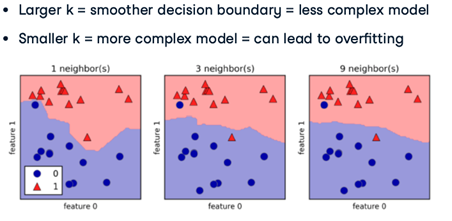

model complexity dan over/underfitting

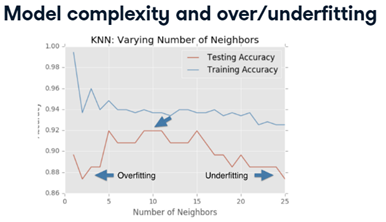

Jika Anda meningkatkan K lebih banyak lagi dan membuat model menjadi lebih sederhana, maka model akan berperforma kurang baik pada set pengujian dan pelatihan, seperti yang ditunjukkan dalam gambar skema ini, yang dikenal sebagai kurva kompleksitas model. Ini disebut underfitting.

Kami dapat melihat bahwa ada sweet spot di tengah yang memberi kami performa terbaik di set pengujian.

#Latihan

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">The digits recognition dataset</h1><div class=""><p>Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform
multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?!
In the following exercises, you'll be working with the <a href="http://yann.lecun.com/exdb/mnist/" target="_blank" rel="noopener noreferrer">MNIST</a> digits recognition dataset, which has
10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise. </p>
<p>Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type <code>Bunch</code>, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an <code>'images'</code> key in addition to the <code>'data'</code> and <code>'target'</code> keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this <code>'images'</code> key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see <a href="https://www.datacamp.com/courses/introduction-to-data-visualization-with-python" target="_blank" rel="noopener noreferrer">Chapter 2</a> of DataCamp's course on Data Visualization with Python). On the other hand, the <code>'data'</code> key contains the feature array - that is, the images as a flattened array of 64 pixels.</p>
<p>Notice that you can access the keys of these <code>Bunch</code> objects in two different ways: By using the <code>.</code> notation, as in <code>digits.images</code>, or the <code>[]</code> notation, as in <code>digits['images']</code>. </p>
<p>For more on the MNIST data, check out <a href="https://campus.datacamp.com/courses/importing-data-in-python-part-1/introduction-and-flat-files-1?ex=10" target="_blank" rel="noopener noreferrer">this exercise</a> in Part 1 of DataCamp's Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.</p></div></div></div></div><div class="listview__section" style="min-height: calc(100% - 33px);"><div><div role="button" class="listview__header"><div class="exercise--sidebar-header"><h5 class="dc-panel__title"><svg aria-label="checkmark_circle icon" class="dc-icon-checkmark_circle dc-u-color-navy dc-u-mr-8" fill="currentColor" height="12" role="Img" width="12"><use xlink:href="/static/media/symbols.e369b265.svg#checkmark_circle"></use></svg>Instructions</h5><strong class="css-1qmgwl8">100 XP</strong></div></div><div aria-hidden="true" role="button" class="listview__header" style="position: absolute; bottom: 0px; width: calc(100% - 17px);"><div class="exercise--sidebar-header"><h5 class="dc-panel__title"><svg aria-label="checkmark_circle icon" class="dc-icon-checkmark_circle dc-u-color-navy dc-u-mr-8" fill="currentColor" height="12" role="Img" width="12"><use xlink:href="/static/media/symbols.e369b265.svg#checkmark_circle"></use></svg>Instructions</h5><strong class="css-1qmgwl8">100 XP</strong></div></div></div><div class="listview__content"><div><div class=""><div class="exercise--instructions exercise--typography"><div class="exercise--instructions__content"><ul>
<li>Import <code>datasets</code> from <code>sklearn</code> and <code>matplotlib.pyplot</code> as <code>plt</code>.</li>
<li>Load the digits dataset using the <code>.load_digits()</code> method on <code>datasets</code>.</li>
<li>Print the keys and <code>DESCR</code> of digits.</li>
<li>Print the shape of <code>images</code> and <code>data</code> keys using the <code>.</code> notation.</li>
<li>Display the 1011th image using <code>plt.imshow()</code>. This has been done for you, so hit 'Submit Answer' to see which handwritten digit this happens to be!</li>
</ul></div><div style="margin: 16px -15px 0px;"><section class="dc-sct-feedback" tabindex="-1"><div></div><nav class="dc-sct-feedback__nav"><ul class="dc-sct-feedback__tab-list"></ul><button class="css-1ms4xsv" type="button" data-cy="exercise-show-hint"><svg viewBox="0 0 18 18" aria-hidden="true" height="18" role="img" width="18"><path fill="currentColor" d="M9 0a7 7 0 014.95 11.95l-.001-.001c-.794.795-.949 1.1-.949 2.051a1 1 0 01-2 0c0-1.548.396-2.325 1.535-3.467l.04-.037a5 5 0 10-7.11.037C6.605 11.675 7 12.453 7 14a1 1 0 01-2 0c0-.951-.155-1.256-.949-2.051A7 7 0 019 0zm0 7a1 1 0 011 1v6a1 1 0 01-2 0V8a1 1 0 011-1zm0 11c-1.657 0-3-.895-3-2h6c0 1.105-1.343 2-3 2z" fill-rule="evenodd"></path></svg><span class="css-x8hx3d">Take Hint (-30 XP)</span></button></nav></section></div></div></div></div></div></div></div>

In [ ]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Train/Test Split + Fit/Predict/Accuracy</h1><div class=""><p>Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the <code>.score()</code> method.</p></div></div></div></div><div class="listview__section" style="min-height: calc(100% - 33px);"><div><div role="button" class="listview__header"><div class="exercise--sidebar-header"><h5 class="dc-panel__title"><svg aria-label="checkmark_circle icon" class="dc-icon-checkmark_circle dc-u-color-navy dc-u-mr-8" fill="currentColor" height="12" role="Img" width="12"><use xlink:href="/static/media/symbols.e369b265.svg#checkmark_circle"></use></svg>Instructions</h5><strong class="css-1qmgwl8">100 XP</strong></div></div></div><div class="listview__content"><div><div class=""><div class="exercise--instructions exercise--typography"><div class="exercise--instructions__content"><ul>
<li>Import <code>KNeighborsClassifier</code> from <code>sklearn.neighbors</code> and <code>train_test_split</code> from <code>sklearn.model_selection</code>.</li>
<li>Create an array for the features using <code>digits.data</code> and an array for the target using <code>digits.target</code>.</li>
<li>Create stratified training and test sets using <code>0.2</code> for the size of the test set. Use a random state of <code>42</code>. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.</li>
<li>Create a k-NN classifier with <code>7</code> neighbors and fit it to the training data.</li>
<li>Compute and print the accuracy of the classifier's predictions using the <code>.score()</code> method.</li>
</ul></div><div style="margin: 16px -15px 0px;"><section class="dc-sct-feedback" tabindex="-1"><div></div><nav class="dc-sct-feedback__nav"><ul class="dc-sct-feedback__tab-list"></ul><button class="css-1ms4xsv" type="button" data-cy="exercise-show-hint"><svg viewBox="0 0 18 18" aria-hidden="true" height="18" role="img" width="18"><path fill="currentColor" d="M9 0a7 7 0 014.95 11.95l-.001-.001c-.794.795-.949 1.1-.949 2.051a1 1 0 01-2 0c0-1.548.396-2.325 1.535-3.467l.04-.037a5 5 0 10-7.11.037C6.605 11.675 7 12.453 7 14a1 1 0 01-2 0c0-.951-.155-1.256-.949-2.051A7 7 0 019 0zm0 7a1 1 0 011 1v6a1 1 0 01-2 0V8a1 1 0 011-1zm0 11c-1.657 0-3-.895-3-2h6c0 1.105-1.343 2-3 2z" fill-rule="evenodd"></path></svg><span class="css-x8hx3d">Take Hint (-30 XP)</span></button></nav></section></div></div></div></div></div></div></div>

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

digits = datasets.load_digits()

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Overfitting and underfitting</h1><div class=""><p>Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.</p>
<p>The training and testing sets are available to you in the workspace as <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code>. In addition, <code>KNeighborsClassifier</code> has been imported from <code>sklearn.neighbors</code>.</p></div></div>

**instructions**

<li>Inside the for loop:<ul>
<li>Setup a k-NN classifier with the number of neighbors equal to <code>k</code>.</li>
<li>Fit the classifier with <code>k</code> neighbors to the training data.</li>
<li>Compute accuracy scores the training set and test set separately using the <code>.score()</code> method and assign the results to the <code>train_accuracy</code> and <code>test_accuracy</code> arrays respectively.</li></ul></li>

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()